# Classify different data sets

### Basic includes

In [2]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

import math

Using TensorFlow backend.


### Classify the Fashion Mnist

---

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


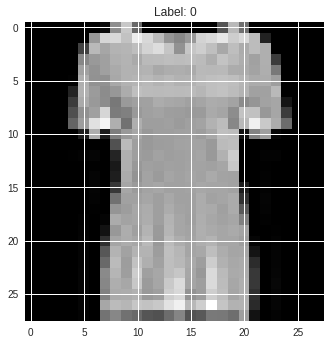

In [0]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)
print(fashion_test_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
# 1.- Normalize the input data set
# flatten arrays
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
fashion_train_data = fashion_train_data.astype('float32') / 255

fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# 2.- Perform one hot encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

validation_set_labels = fashion_train_labels[50000:]
validation_set = fashion_train_data[50000:]

training_set_labels = fashion_train_labels[:50000] # y
training_set = fashion_train_data[:50000] # X

In [0]:
print("training_setshape: ", training_set.shape)
print("training_set_labels: ", training_set_labels.shape)

training_setshape:  (50000, 784)
training_set_labels:  (50000, 10)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)      

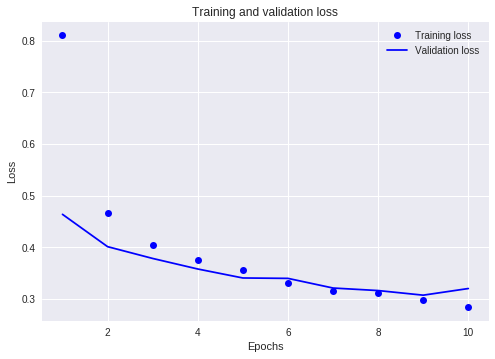

10000/10000 [==============================] - 1s 95us/step
[0.34172913324832915, 0.8777]


In [0]:
# 1.- Use a validation set
# 2.- Propose and train a network

# the network as a sequence of layers
network = models.Sequential()


#network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
# Added dropout between the input and first hidden layer
network.add(layers.Dropout(0.3))
#network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
# Added dropout between the first hidden layer and the second one
#network.add(layers.Dropout(0.3))

network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(10, activation='softmax'))
network.summary()


# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)


network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3.- Print the history of the training
history = network.fit(training_set, training_set_labels,
          #batch_size=512,
          batch_size=1024,
          epochs=10,
          validation_data = (validation_set,validation_set_labels),
          callbacks=[early_stop],
          verbose=2)

history_dict = history.history
print(history_dict.keys())

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

#Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# 4.- Evaluate with a test set
results = network.evaluate(fashion_test_data, fashion_test_labels)

print(results)

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [0]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=8982)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [0]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

557056/550378 [==============================] - 0s 0us/step
<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
# 1.- Normalize the input data set

tokenizer = Tokenizer(num_words=8982)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(train_data_token.shape)
print(test_data_token.shape)

# 2.- Perform one hot encoding
num_classes = 46
one_hot_train_labels = to_categorical(reuters_train_labels)
one_hot_test_labels = to_categorical(reuters_test_labels)
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

# 3.- Create a train, test, and validation set

# Creating a validation set with the first 10000 reviews
routers_validation_data = train_data_token[:1000]
routers_validation_labels = one_hot_train_labels[:1000]

print(routers_validation_data.shape)
print(routers_validation_labels.shape)
# Creating the input set
x_data = train_data_token[1000:]
y_data = one_hot_train_labels[1000:]
print(x_data.shape)
print(y_data.shape)

#print(test_data_token.shape)
#print(reuters_test_labels.shape)


(8982, 8982)
(2246, 8982)
(8982, 46)
(2246, 46)
(1000, 8982)
(1000, 46)
(7982, 8982)
(7982, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                574912    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 46)                1518      
Total params: 578,510
Trainable params: 578,510
Non-trainable params: 0
_________________________________________________________________
(7982, 8982)
(7982, 46)
(1000, 8982)
(1000, 46)
Train on 7982 samples, validate on 1000 samples
Epoch 1/30
 - 2s - loss: 2.6940 - acc: 0

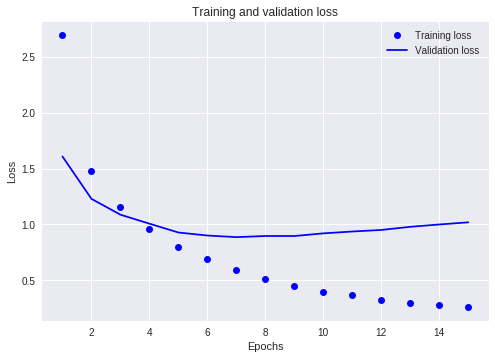

2246/2246 [==============================] - 0s 90us/step
[1.1561745974174698, 0.7907390917716871]


In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=8982))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

early_stop = callbacks.EarlyStopping(monitor='val_acc', patience=5)
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 3.- Print the history of the training
print(x_data.shape)
print(y_data.shape)
print(routers_validation_data.shape)
print(routers_validation_labels.shape)
history = model.fit(x_data, y_data,
          batch_size=128,
          epochs=30,
          validation_data = (routers_validation_data,routers_validation_labels),
          callbacks=[early_stop],
          verbose=2)

history_dict = history.history
print(history_dict.keys())

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

#Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# 4.- Evaluate with a test set
results = model.evaluate(test_data_token, one_hot_test_labels)

print(results)

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [5]:
student_data = pd.read_csv("./student_data.csv")
print(student_data)
print(student_data.shape)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

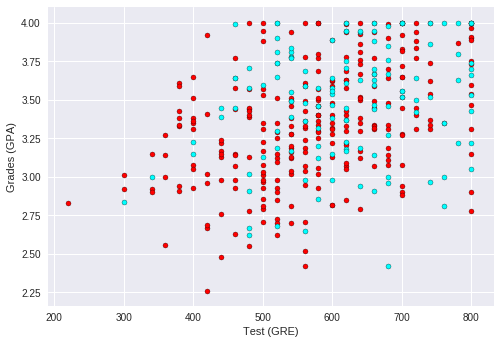

In [6]:
X = np.array(student_data[["gre","gpa"] ])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

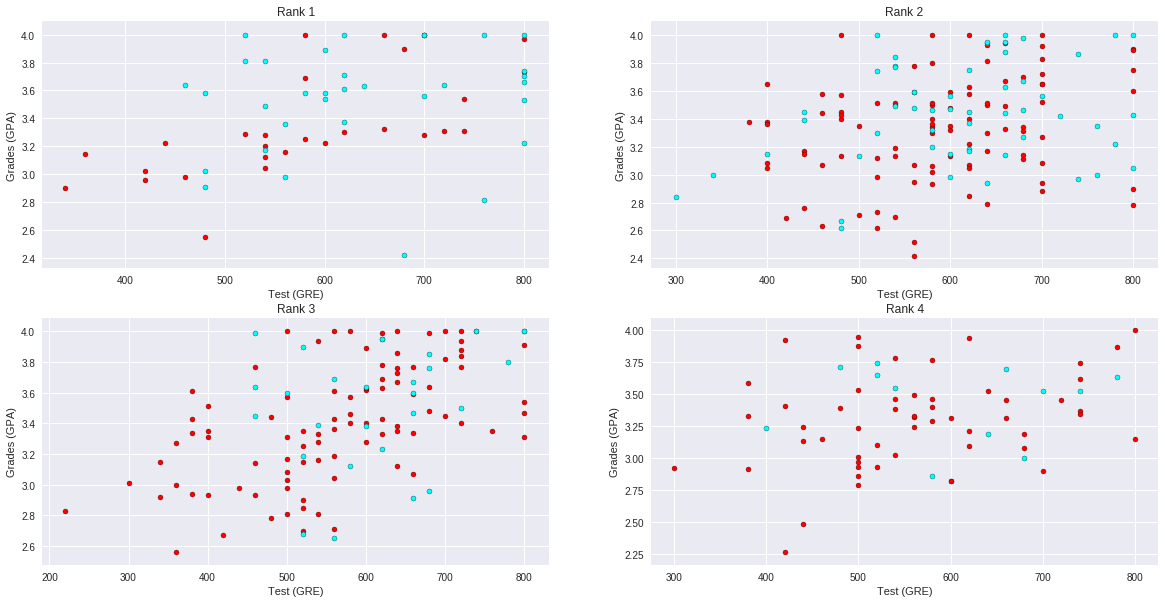

In [7]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
def stdrize(vector):
  mean = np.mean(vector)
  sigma = np.std(vector)
  for i in range(0, vector.size):
    vector[i] = (vector[i] - mean)/sigma
     
def clean_data(dataset):
  index = 0
  limit = dataset.shape[0]
  while(index < limit):
    flag = 0
    for j in range(0, dataset.shape[1]):
      if math.isnan(dataset[index][j]):
        flag = 1
    if flag:
      dataset = np.delete(dataset, index, axis=0)
      index = index - 1
      limit = limit - 1
    index = index + 1
  return dataset

#print(student_data)
student_data_array = np.array(student_data)
print(student_data_array[0])

X_gre = student_data_array[:,1]
print(X_gre)
X_gpa = student_data_array[:,2]
print(X_gpa)

stdrize(X_gre)
stdrize(X_gpa)
print(X_gre)
print(X_gpa)

[  0.   380.     3.61   3.  ]
[380. 660. 800. 640. 520. 760. 560. 400. 540. 700. 800. 440. 760. 700.
 700. 480. 780. 360. 800. 540. 500. 660. 600. 680. 760. 800. 620. 520.
 780. 520. 540. 760. 600. 800. 360. 400. 580. 520. 500. 520. 560. 580.
 600. 500. 700. 460. 580. 500. 440. 400. 640. 440. 740. 680. 660. 740.
 560. 380. 400. 600. 620. 560. 640. 680. 580. 600. 740. 620. 580. 800.
 640. 300. 480. 580. 720. 720. 560. 800. 540. 620. 700. 620. 500. 380.
 500. 520. 600. 600. 700. 660. 700. 720. 800. 580. 660. 660. 640. 480.
 700. 400. 340. 580. 380. 540. 660. 740. 700. 480. 400. 480. 680. 420.
 360. 600. 720. 620. 440. 700. 800. 340. 520. 480. 520. 500. 720. 540.
 600. 740. 540. 460. 620. 640. 580. 500. 560. 500. 560. 700. 620. 600.
 640. 700. 620. 580. 580. 380. 480. 560. 480. 740. 800. 400. 640. 580.
 620. 580. 560. 480. 660. 700. 600. 640. 700. 520. 580. 700. 440. 720.
 500. 600. 400. 540. 680. 800. 500. 620. 520. 620. 620. 300. 620. 500.
 700. 540. 500. 800. 560.  nan 560. 500. 640. 8

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set